# Implementing Least Squares Linear Regression for Binary Classification

Among the simplest statistical models of supervised learning is that of *least squares linear regression*. When applied to the task of classification, the model seeks to find a line, (or, higher-dimensionally, a hyperplane) which separates input space into two distinct regions, one for each class. If such a division of space exists, we say that the two classes are *linearly separable*. Given a random variable $X = (X_1, X_2, \ldots, X_n)^{T}$, a weight vector $\beta = (\beta_1, \beta_2, \ldots, \beta_n)^{T}$, and a bias $\beta_0$ we *discriminate* the class to which $X$ belongs according to the output of the following function

$$\delta(X) = \begin{cases}
                1 & X^{T}\beta + \beta_0 \geq 0 \\
                -1 & X^{T}\beta + \beta_0 < 0
              \end{cases}$$
              
where the outputs of +1 and -1 indicate $X$'s membership in either of class one or class two, respectively. Such a function is clearly deterministic. In this tutorial, we will demonstrate how an optimal decision boundary may be calculated given a set of suitable training data.

## Preparing Our Python Environment

First, we import the packages we will use for data manipulation and visualization, namely Numpy, Matplotlib, and Pandas.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Preparing Our Training Set

We are given a set of binary classification data in two files, `data/x.txt` and `data/y.txt`. The first file contains the data points themselves (i.e. their locations in 2D coordinate space), and the second contains for each data point the class to which it belongs. As it stands, class one has one more data point associated with it than class two, so we pick a point from class one and discard it.

In [2]:
# Read in data
x_vals = np.loadtxt('data/x.txt')
y_vals = np.loadtxt('data/y.txt')

# Throw out one data point so that there
# are an equal number from each class.
class_one = x_vals[:49, :]
class_two = x_vals[50:, :]

# Create data array for plotting
data = np.hstack((class_one, class_two))

## Visualizing Our Data

Here we create a Pandas DataFrame to hold our data and then create a scatter plot of it. We identify the class to which each point belongs by coloring it accordingly. Here we use orange for class one and light blue for class two.

<IPython.core.display.Javascript object>


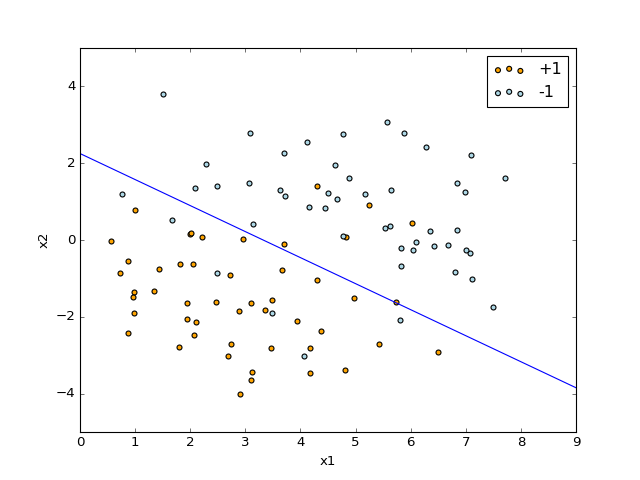

In [11]:
# Create Pandas DataFrame for holding binary class data.
df = pd.DataFrame(data, columns=['x', 'y', 'x1', 'x2'])

# Create scatter plot of data points in both classes.
class_ax = df.plot.scatter(x='x', y='y', color='Orange', label='+1');
df.plot.scatter(x='x1', y='x2', color='LightBlue', label='-1', ax=class_ax);

## Calculating the Least Squares Decision Boundary

Now that we've properly prepared our data for analysis, we can calculate our linear decision boundary using the method of least squares. We will present a general solution for this problem, in $n$-dimensional space. Given an $n$-dimensional input, $X^{T} = (X_1, X_2, \ldots, X_n)$, our decision boundary $Y$ has the form

$$Y = \beta_0 + \sum_{i=1}^n X_i\beta_i$$

The term $\beta_0$ is called the *bias* of our separating hyperplane. If we incorporate a zeroth column of 1's into $X$ we can likewise include $\beta_0$ in the complete coefficient vector $\beta$ and write our model in the more compact form

$$Y = X^{T}\beta$$

In this form, it is clear that $Y' = \beta$ is a gradient vector which completely determines the equation of the line giving our decision boundary.

In order to fit our model to the training data at hand, we use the method of least squares. This method requires that we choose gradient vector $\beta$ in such a way so as to minimize a quantity called *the residual sum of squares*, defined as

$$\text{RSS}(\beta) = \sum_{i=1}^N (y_i - x_i^{T}\beta)^2$$

where $N$ is the number of data points in our training set, not to be confused with the dimensionality of these points. Intuitively, this is a sum of the squared losses present in any misclassifications of data points in the training set made by a given decision vector $\beta$. Because the residual sum of squares is quadratic in $\beta$, it always exhibits some local minima, although these minima are not guaranteed to be unique. To calculate these minima, we proceed as in ordinary differential calculus and find the critical points of the RSS function. Writing the RSS in matrix notation, we see

$$RSS(\beta) = (y-X\beta)^{T}(y-X\beta)$$

Differentiating with respect to $\beta$, we get the *normal equation*

$$X^{T}(y-X\beta) = 0$$

the solution to which (provided $X^T X$ is nonsingular) is

$$\beta = (X^{T}X)^{-1}X^{T}y$$

We calculate our $\beta$ below.

In [13]:
# Create complete data array comprised
# of all points from both classes.
X = np.vstack((class_one, class_two))
m = len(X)

# Add column of ones to account for bias term
X = np.array([np.ones(m), X[:, 0], X[:, 1]]).T

# Create y array of class labels
y = np.concatenate((y_vals[51:], y_vals[:50])).T

# Calculate the Regularized Least Squares solution
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

## Plotting Our Decision Boundary

Finally, we plot our decision boundary. As you can see, given the extent to which our dataset is linearly separated, our linear decision boundary provides great utility in the division of input space and the binary classification of unknown data points. Remember our discriminant function? Our decision boundary is found by setting it equal to zero. In other words, we have

\begin{align*}
    \delta(x) &= 0 \\
    x^{T}\beta + \beta_0 &= 0 \\
    \beta_0 + \beta_1x_1 + \beta_2x_2 &= 0 \\
     -\frac{\beta_0}{\beta_2} - \frac{\beta_1}{\beta_2}x_1 &= x_2
\end{align*}

In [14]:
# Plot the resulting regression line
line_x = np.linspace(0, 9)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x

class_ax.plot(line_x, line_y)
class_ax.set_xlim((0, 9));
class_ax.set_ylim((-5, 5));

# Calculating Our Minimal *RSS* Error

As stated above, the error function $RSS(\beta)$ measures the extent to which a given decision boundary $X^{T}\beta$ misclassifies the points of our data set.

(98, 3)
The minimum RSS error is: 39.9441945166


C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


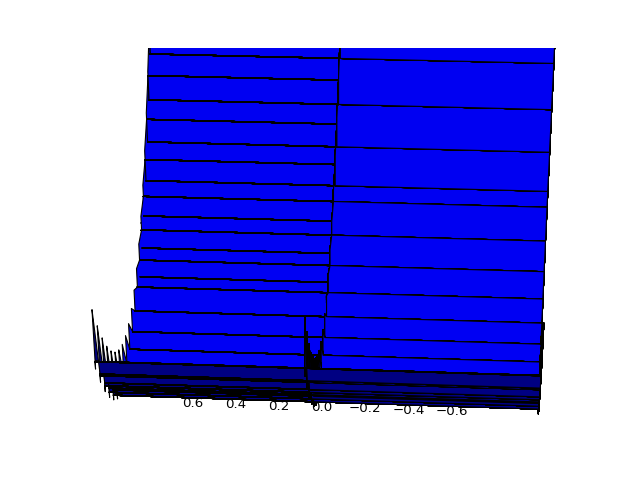

In [83]:
# Calculate the minimal RSS error
rss = np.sum((y - X @ beta) ** 2)

print(X.shape)
print("The minimum RSS error is: " + str(rss))

val_range = np.linspace(-1, 1, 20)

def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

xy = cartesian((val_range, val_range));
beta_prime = np.array([np.ones(len(xy)), xy[:, 0], xy[:, 1]]).T
z = []
for j in range(len(beta_prime)):
    z.append(np.sum((y - X @ beta_prime[j, :]) ** 2))
    
fig = plt.figure()
ax = fig.gca(projection='3d')

XX, YY = np.meshgrid(xy[:, 0], xy[:, 1])
ax.plot_surface(XX, YY, z)

In [60]:
print(X.shape)

(98, 3)
